In [1]:
import seaborn as sns
from itertools import product
import matplotlib.pyplot as plt
from statistics import mean

sns.set_context("poster")
import pandas as pd
%matplotlib inline

In [1]:
df = pd.read_csv('datasets/20221111122031_test_queries.csv')

grid = sns.relplot(data=df, y="time", x='sequence database', hue="discovery algorithm",kind="scatter")
grid.set(yscale='log')
grid.savefig('plots/test_queries.svg')

NameError: name 'pd' is not defined

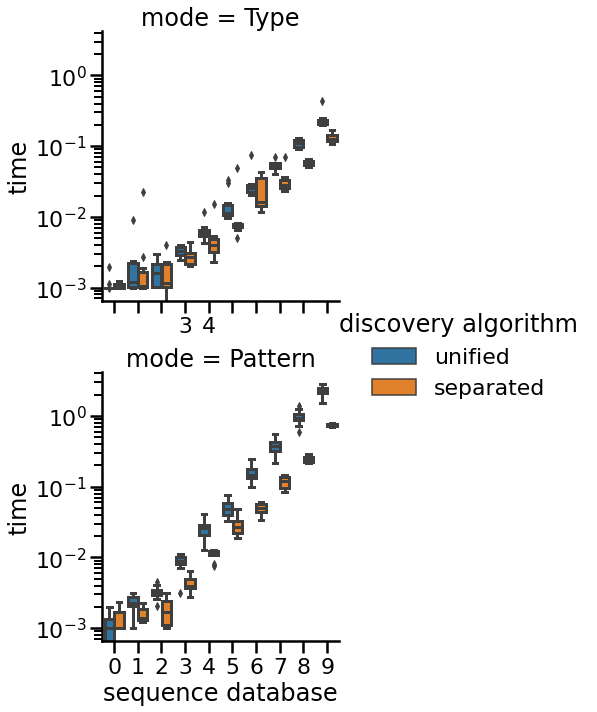

In [29]:
df = pd.read_csv('datasets/20221111093002_synt_queries_10.csv')
grid = sns.catplot(data=df.loc[df['mode'] != 'Mixed'], y="time", x="iterations", hue="discovery algorithm",kind="box", col='mode', col_wrap=1)
grid.set(yscale='log', xlabel='sequence database' )
# grid.fig.set_figwidth(10)
grid.savefig('plots/synt_queries.svg')

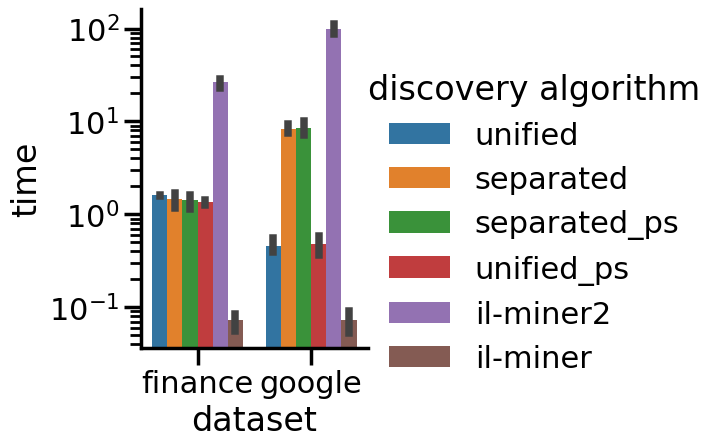

In [5]:
dataframe = pd.read_csv('results/datasets/sota_100_7.csv')
df = dataframe.loc[((dataframe['iterations'] == 'Abstraction 2') & (dataframe['mode'] == 'google')) | ((dataframe['iterations'] == 'Abstraction 1') & (dataframe['mode'] == 'finance'))]
file_name = 'sota_100_7'
hatches = {'unified':'.',
                   'separated': '/',
                   'unified_ps': '|',
                   'separated_ps': '//',
                   'il-miner': 'x',
                   'il-miner2': 'o',
                   'rl': '/',}
x='mode'
y='time'
hue='discovery algorithm'
# fig, grid = plt.subplots(1,2, sharey=True, layout='constrained', figsize=(12, 3))
# grid[0].set(yscale='log')
cart_product = list(product(df['discovery algorithm'].unique(), df['iterations'].unique()))
querystring_dict = {}

for queryset in df['queryset']:
    for querystring in queryset:
        if querystring in querystring_dict:
            continue
        querystring_dict[querystring] = 0
        for event in querystring.split():
            querystring_dict[querystring] += sum(1 for dim in event.split(';') if dim)
# for idx, mod in enumerate(['google', 'finance']):
# data_subplot = df.loc[df['mode'] == mod]
grid = sns.catplot(data=df, y=y, x=x,hue=hue, kind='bar')
grid.set(yscale='log', xlabel='dataset' )


grid.savefig(f'results/plots/{file_name}_poster.pdf')